# Question 6

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def readAndConvert(str):
    img = cv2.imread(str, cv2.IMREAD_GRAYSCALE)
    return np.int64(np.array(img))

In [3]:
def histEqualization(im):
    hist = np.histogram(im.flatten(),256,[0,256])[0]
    cdf = hist.cumsum()
    cdf = cdf / cdf.max()
    cdf_m = np.ma.masked_equal(cdf,0)
    cdf_m = np.round((cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min()))
    cdf = np.uint8(np.ma.filled(cdf_m,0))
    return cdf[im]

In [4]:
def showIm(im):
    out = histEqualization(im)
    arr = plt.subplots(1,2,figsize =(15,15))[1]

    plt.gray()
    arr[0].imshow(im)
    arr[0].set_title("Original")
    arr[1].imshow(out)
    arr[1].set_title("Histogram Equalized")
    plt.show()

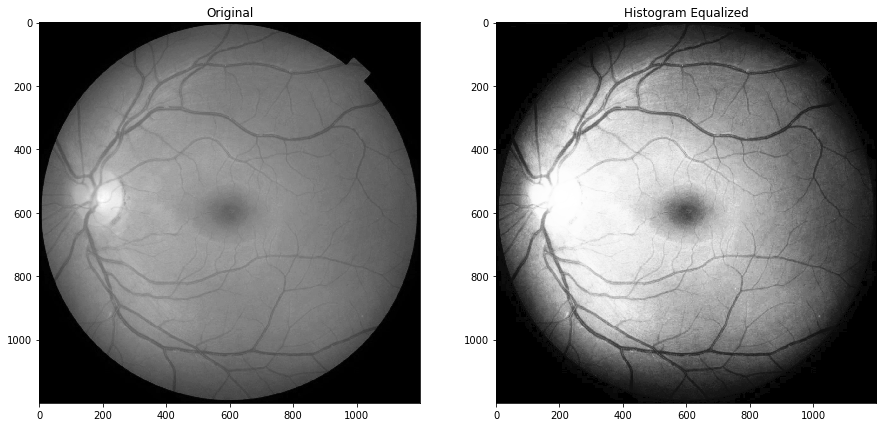

In [5]:
im = readAndConvert('res/eye.png')
showIm(im)

## Explanation :
> After histogram equalization, we are able to see the nerves in the eye more clearly. This is because, there were more grayish regions in the eye which after equalization have turned to more darker and brighter intensities and hence we are able to perceive such detail in the image

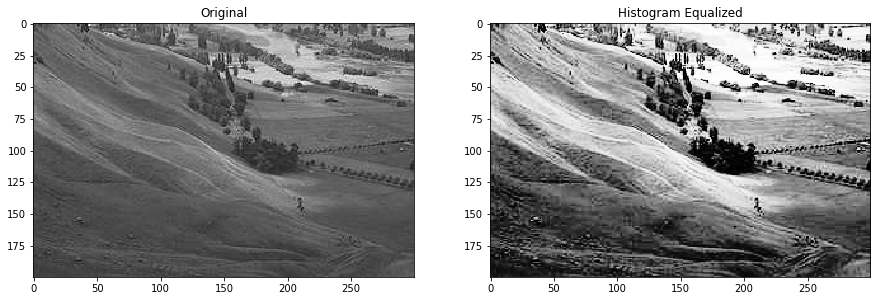

In [6]:
im = readAndConvert('res/hist1.jpg')
showIm(im)

## Explanation :
> This is almost the same as the previous image. The relatively brighter regions of the input image gets more brighter and similarly the darker regions gets darker.

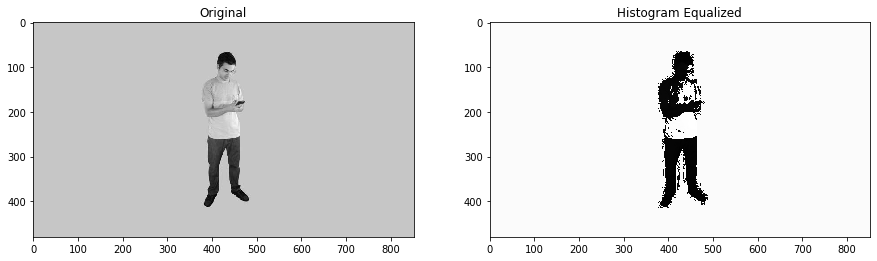

In [7]:
im = readAndConvert('res/fg1.jpg')
showIm(im)

## Explanation :
> The background occupies a greater part of the image and it does not need to change, hence applying histogram equalization on such images leads to the loss of detail from the main object in the image.

In [8]:
def histMatching(im1, im2):
    shp = im1.shape
    val1, ind1, ct1 = np.unique(im1,return_inverse = True, return_counts = True)
    val2, ind2, ct2 = np.unique(im2,return_inverse = True, return_counts = True)
    cdf1 = np.cumsum(ct1)
    cdf1 = cdf1 / cdf1.max()
    cdf2 = np.cumsum(ct2)
    cdf2 = cdf2 / cdf2.max()
    x1 = np.round(cdf1*255)
    x2 = np.round(cdf2*255)

    res = []
    for i in x1[:]:
        df = x2 - i
        mask = np.ma.masked_less(df, 0)
        if np.any(mask):
            z = abs(df)
            res.append(z.argmin())
        else:
            df = np.ma.masked_array(df, mask)
            res.append(df.argmin())
    
    res = np.uint8(np.array(res))
    return res[ind1].reshape(shp)
        

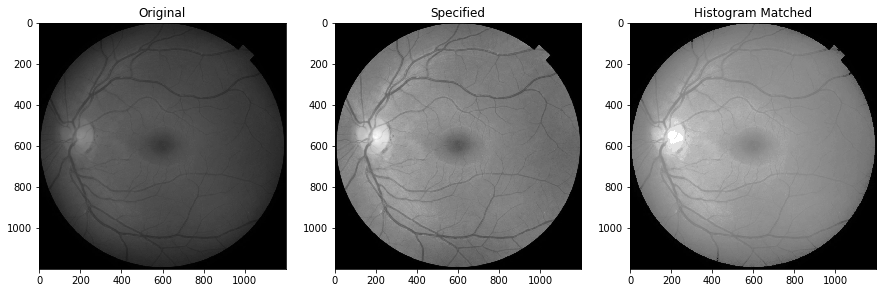

In [9]:
img1 = readAndConvert('res/eye.png')
img2 = readAndConvert('res/eyeref.png')

out = histMatching(img1, img2)

arr = plt.subplots(1,3,figsize =(15,15))[1]

plt.gray()
arr[0].imshow(img1,vmin=0,vmax = 255)
arr[0].set_title("Original")
arr[1].imshow(img2)
arr[1].set_title("Specified")
arr[2].imshow(out)
arr[2].set_title("Histogram Matched")
plt.show()

In [10]:
part1 = readAndConvert('res/part1.png')
part2 = readAndConvert('res/part2.png')
part3 = readAndConvert('res/part3.png')
part4 = readAndConvert('res/part4.png')

part1 = histEqualization(part1)
part2 = histEqualization(part2)
part3 = histEqualization(part3)
part4 = histEqualization(part4)

out1 = np.vstack((part1, part3))
out2 = np.vstack((part2, part4))
out = np.hstack((out1, out2))

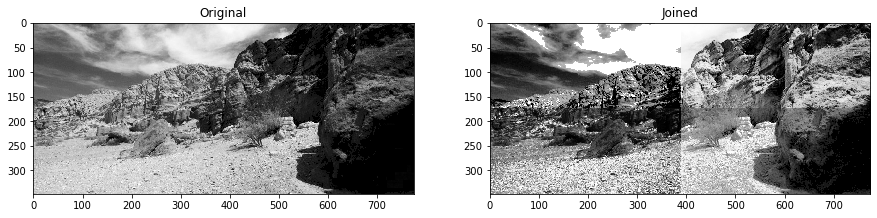

In [11]:
orig = readAndConvert('res/canyon.png')

arr = plt.subplots(1,2,figsize =(15,15))[1]
plt.gray()
arr[0].imshow(orig)
arr[0].set_title("Original")
arr[1].imshow(out)
arr[1].set_title("Joined")
plt.show()

## Joining the images :
- Applied histogram equalization on all parts of the image.
- Joined them by using vstack and hstack functions of numpy.